지금까지 훈련 세트에서 모델을 훈련하고 테스트 세트에서 모델을 평가하였다. 테스트 세트에서 얻어진 점수를 보고 모델의 성능을 가늠해 볼 수 있다. 즉 일반화 성능을 가늠해 볼 수 있다는 것이다.  
그런데 테스트 세트를 사용해 자꾸 성능을 확인하다 보면 점점 테스트 세트에 맞추게 된다.  
  
이전까지는 문제를 간단히 하려고 테스트 세트를 사용하였다. 하지만 테스트 세트로 일반화 성능을 올바르게 예측하려면 가능한 한 테스트 세트를 사용하지 말아야 한다. 모델을 만들고 나서 마지막에 딱 한 번만 사용하는 것이 좋다.  
그렇다면 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝을 어떻게 할 수 있을까? 게다가 결정 트리는 테스트해 볼 매개변수가 많다.

### 검증 세트  
테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 판단하기 어렵다. 테스트 세트를 사용하지 않고 이를 측정하는 간단한 방법은 훈련 세트를 또 나누는 것이다. 이 데이터를 **검증 세트(validation set)**라고 부른다.  
단순한 방법이지만 많이 사용되는 방법이다. 1절에서 전체 데이터 중 20%를 테스트 세트로 만들고 나머지 80%를 훈련 세트로 만들었다. 이 훈련 세트 중에서 다시 20%를 떼어 내어 검증 세트로 만든다.  
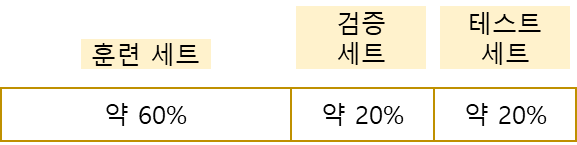

훈련 세트에서 모델을 훈련하고 검증 세트로 모델을 평가한다. 이런 식으로 테스트하고 싶은 매개변수를 바꾸어가며 가장 좋은 모델을 고른다. 그다음 이 매개변수를 사용해 훈련 세트와 검증 세트를 합쳐 훈련 데이터에서 모델을 다시 훈련한다. 그리고 마지막에 테스트 세트에서 최종 점수를 평가한다.  
아마도 실전에 투입했을 때의 테스트 세트의 점수와 비슷한 성능을 기대할 수 있을 것이다.  
  
이전 절에 사용했던 데이터를 다시 불러와서 검증 세트를 만들어 보자. 먼저 판다스로 CSV 데이터를 읽는다.

In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
print(wine) # 판다스로 읽은 데이터를 눈으로 익히자.

      alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]


class 열을 타깃으로 사용하고 나머지 여은 특성 배열에 저장한다.

In [10]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
print(data) # 넘파이 배열로 변환한 데이터를 눈으로 익히자.

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


훈련 세트와 테스트 세트를 나눈다. 방식은 이전과 동일하다.

In [11]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size = 0.2, random_state = 42)

train_input과 train_target을 다시 train_test_split() 함수에 넣어 훈련 세트 sub_input, sub_target과 검증 세트 val_input, val_target을 만든다.  
여기에서도 test_size 매개변수를 0.2로 지정하여 train_input의 20%를 val_input으로 만든다.

In [12]:
sub_input, val_input, sub_target, val_target = train_test_split(
train_input, train_target, test_size = 0.2, random_state = 42)